In [ ]:
# Importing Libraries
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/A1/

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/A1


Linear Regression

In this section, you will build and evaluate a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. 

### **Multiple linear regression for sales prediction**

The `advertising.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. 
The sales are in thousands of units and the budget is in thousands of dollars.  

The goal is to predict the sales of the product given the TV, radio, and newspaper ad budgets using a linear regression model.

### Load the dataset


In [ ]:
df = pd.read_csv('advertising.csv') #load the dataset using pandas

#dataset dimensions
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

#dataset features and target attributes
X = df.drop("Sales" ,axis= 1) #set the X(features) to all the columns except for the target attribute
y = df["Sales"] #set the y(target attribute) to the the target attribute which is the Sales

Number of rows:  200
Number of columns:  4


###  Normalize the features in the dataset.



In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Split the data into train and test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split the data into train and test with test size equal to 20% and train size equal to 80%

### Build the model using *LinearRegression*

In [ ]:
lr_model = LinearRegression().fit(X_train, y_train) #fit and build the model using linear regression
print("Model parameters: ")
print("Intercept: ", lr_model.intercept_) #the model intercept parameter
print("Coefficients: ", lr_model.coef_) #the model coefficients
print("\nModel equation: ")
print("y = ", lr_model.intercept_, "+", lr_model.coef_[0], "* TV +", lr_model.coef_[1], "* radio +", lr_model.coef_[2], "* newspaper") #the model equation

Model parameters: 
Intercept:  15.210200677006172
Coefficients:  [4.66813753 1.49496505 0.09420978]

Model equation: 
y =  15.210200677006172 + 4.668137529049526 * TV + 1.4949650461011386 * radio + 0.09420977549603599 * newspaper


### Build the model using *SGDRegressor*

In [ ]:
sgdr_model = SGDRegressor().fit(X_train, y_train) #fit and build the model using SGDRegressor
print("Model parameters: ")
print("Intercept:", sgdr_model.intercept_) #the model intercept parameter
print("Coefficients:", sgdr_model.coef_) #the model coefficients
print("\nModel equation: ")
print("y = ", sgdr_model.intercept_, "+", sgdr_model.coef_[0], "* TV +", sgdr_model.coef_[1], "* radio +", sgdr_model.coef_[2], "* newspaper") #the model equation

Model parameters: 
Intercept: [15.19228739]
Coefficients: [4.66781045 1.4884107  0.09377883]

Model equation: 
y =  [15.19228739] + 4.667810446801177 * TV + 1.4884106950204503 * radio + 0.09377882701924309 * newspaper


### Models evaluation and comparisons


In [ ]:
print("Linear Regression: ")
y_train_pred = lr_model.predict(X_train) #predict the model (train data)
y_test_pred = lr_model.predict(X_test) #predict the model (test data)

#calculate the MSE and R2 scores for the traninng and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#print the training and testing MSE and R2 scores
print("\nTraining MSE: ", mse_train)
print("Training R2: " , r2_train)
print("Testing MSE: ", mse_test)
print("Testing R2: " , r2_test)

print("\nSGDRegressor: ")
y_train_pred = sgdr_model.predict(X_train) #predict the model (train data)
y_test_pred = sgdr_model.predict(X_test) #predict the model (test data)

#calculate the MSE and R2 scores for the traninng and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#print the training and testing MSE and R2 scores
print("\nTraining MSE: ", mse_train)
print("Training R2: " , r2_train)
print("Testing MSE: ", mse_test)
print("Testing R2: " , r2_test)

Linear Regression: 

Training MSE:  2.6761426537826694
Training R2:  0.9001416005862131
Testing MSE:  2.907756910271093
Testing R2:  0.9059011844150825

SGDRegressor: 

Training MSE:  2.676502586820191
Training R2:  0.9001281699355815
Testing MSE:  2.897456721412733
Testing R2:  0.9062345119943066




---

I will compare the models using the test data since it is the dataset that will tell if the predictive quality of the model is good or not.

We can see from the result above that SGDRegressor model has the lowest MSE(2.89) and that makes it better than the linear regression model. Beside, SGDRegressor model has the highest R2(0.906) and that also makes it better that the linear regression model.

So the SGDRegressor model is better than the linear regression model.

---




Logistic Regression 

In this section, you'll build and evaluate a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. 

### **Multiple logistic regression to identify forged banknotes.**

The `banknote_authentication.csv` dataset has been created from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.  

The goal is to identify forged banknotes using logistic regression model that can  distinguish between genuine and forged banknotes given features extarcted from their images.

### Load the dataset


In [ ]:
df = pd.read_csv('banknote_authentication.csv') #load the dataset using pandas

#dataset dimensions
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

#dataset features and class attribute
X = df.drop("class" ,axis= 1) #set the X(features) to all the columns except for the class attribute
y = df['class'] #set the y(class attribute) to the class attribute which is the class

Number of rows: 1372
Number of columns: 5


### Normalize the features.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Split the data into train and test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split the data into train and test with test size equal to 20% and train size equal to 80%

### Build the model.

In [ ]:
lr_model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train) #fit and build the model using LogisticRegression

### Model Evaluation on training and test set.


Traning: 

Accuracy:  0.9817684594348223
Precision:  0.9620758483033932
Recall:  0.9979296066252588

Confusion matrix: 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


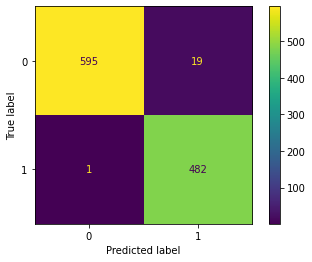


Testing: 

Accuracy:  0.9781818181818182
Precision:  0.9689922480620154
Recall:  0.984251968503937

Confusion matrix: 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


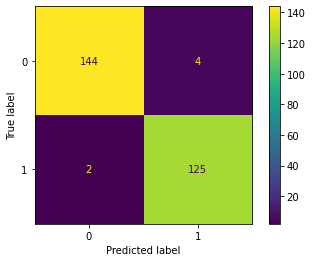

In [ ]:
print("Traning: ")

y_predtrain = lr_model.predict(X_train) #predict the model
print("\nAccuracy: ", accuracy_score(y_train, y_predtrain)) #calculate the accuracy
print("Precision: ", precision_score(y_train, y_predtrain)) #calculate the precision
print("Recall: ", recall_score(y_train, y_predtrain)) #calculate the recall

#make and plot the confusion matrix
print("\nConfusion matrix: ")
cm = confusion_matrix(y_train, y_predtrain)
plot_confusion_matrix(lr_model, X_train, y_train)
plt.show()

print("\nTesting: ")

y_predtest = lr_model.predict(X_test) #predict the model
print("\nAccuracy: ", accuracy_score(y_test, y_predtest)) #calculate the accuracy
print("Precision: ", precision_score(y_test, y_predtest)) #calculate the precision
print("Recall: ", recall_score(y_test, y_predtest)) #calculate the recall

#make and plot the confusion matrix
print("\nConfusion matrix: ")
cm = confusion_matrix(y_test, y_predtest)
plot_confusion_matrix(lr_model, X_test, y_test)
plt.show()

---
Traning 

-The accuracy of the model is 0.98, which means that the model was able to correctly predict the class for 98% of the traning data.

-The precision of 0.96 means that, when the model predicts positive class, it is correct 96% of the time.

-The recall of model equal to 0.99 which means that the 99% of positive class predictions correctly.

Testing

-The accuracy of the model is 0.97, which means that the model was able to correctly predict the class for 97% of the testing data.

-The precision of 0.96 means that, when the model predicts positive class, it is correct 96% of the time.

-The recall of model equal to 0.98 which means that the 98% of positive class predictions correctly.

---

###Try different classification threshold.

In [ ]:
#adjusting the threshold by trying the following values: 0.1, 0.10, 0.25
#any data point with a probability  of 0.1, 0.10, 0.25 or higher will be classified as 1. 
THRESHOLDS = [0.1, 0.25, 0.4] #thresholds values
for THRESHOLD in THRESHOLDS:
    y_pred = np.where(lr_model.predict_proba(X_train)[:,1] >= THRESHOLD, 1, 0)
    y_pred = (lr_model.predict_proba(X_train)[:,1] >= THRESHOLD).astype(int)
    print(y_pred[:5])
    y_pred_proba= lr_model.predict_proba(X_train)[:,1] 
    print(y_pred_proba[:5])
    #calculate accuracy, precision, recall
    print("Threshold: ", THRESHOLD)
    print("Accuracy: ", accuracy_score(y_train, y_pred))
    print("Precisions: ", precision_score(y_train, y_pred))
    print("Recalls: ", recall_score(y_train, y_pred))
    print("\n")

[0 0 1 0 0]
[1.13103817e-03 1.40186028e-03 9.76601817e-01 4.74145665e-04
 1.54272075e-02]
Threshold:  0.1
Accuracy:  0.959890610756609
Precisions:  0.9165085388994307
Recalls:  1.0


[0 0 1 0 0]
[1.13103817e-03 1.40186028e-03 9.76601817e-01 4.74145665e-04
 1.54272075e-02]
Threshold:  0.25
Accuracy:  0.9744758432087511
Precisions:  0.9452054794520548
Recalls:  1.0


[0 0 1 0 0]
[1.13103817e-03 1.40186028e-03 9.76601817e-01 4.74145665e-04
 1.54272075e-02]
Threshold:  0.4
Accuracy:  0.9817684594348223
Precisions:  0.9602385685884692
Recalls:  1.0




---

The best threshold here is (0.4) since it gives the highest accuracy and precision.

---

### Find the optimal classification threshold

In [ ]:
#Compute precision-recall pairs for different probability thresholds.
y_pred = lr_model.predict_proba(X_train)[:,1]
precision, recall, thresholds = precision_recall_curve(y_train, y_pred)
fscores = (2 * precision * recall) / (precision + recall)
optimal_idx = np.argmax(fscores)
print("Optimal threshold: ", thresholds[optimal_idx])
print("F score: ",fscores[optimal_idx])

Optimal threshold:  0.701337808166913
F score:  0.9927007299270074


---

The optimal threshold for the training set is (0.70) with an F score equal to (0.99), which means that this threshold gives the best performance in the model.

---